In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from warnings import filterwarnings
filterwarnings(action='ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the dataset
train= pd.read_csv('/content/train.csv')

In [ ]:
# Exploratory Data Analysis (EDA)
print("Shape of dataset:",train.shape)

Shape of dataset: (891, 12)


In [ ]:
print("Columns in dataset:", train.columns)

Columns in dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#Checking for Null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Description of dataset
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000



=== Exploring Relationships ===


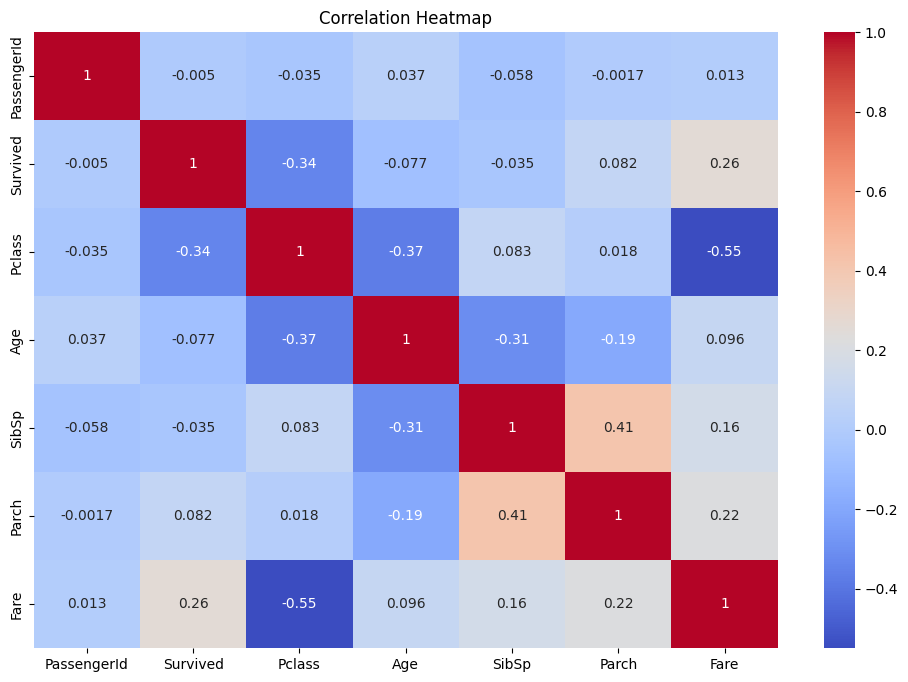

In [ ]:
# Exploring relationships
print("\n=== Exploring Relationships ===")
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


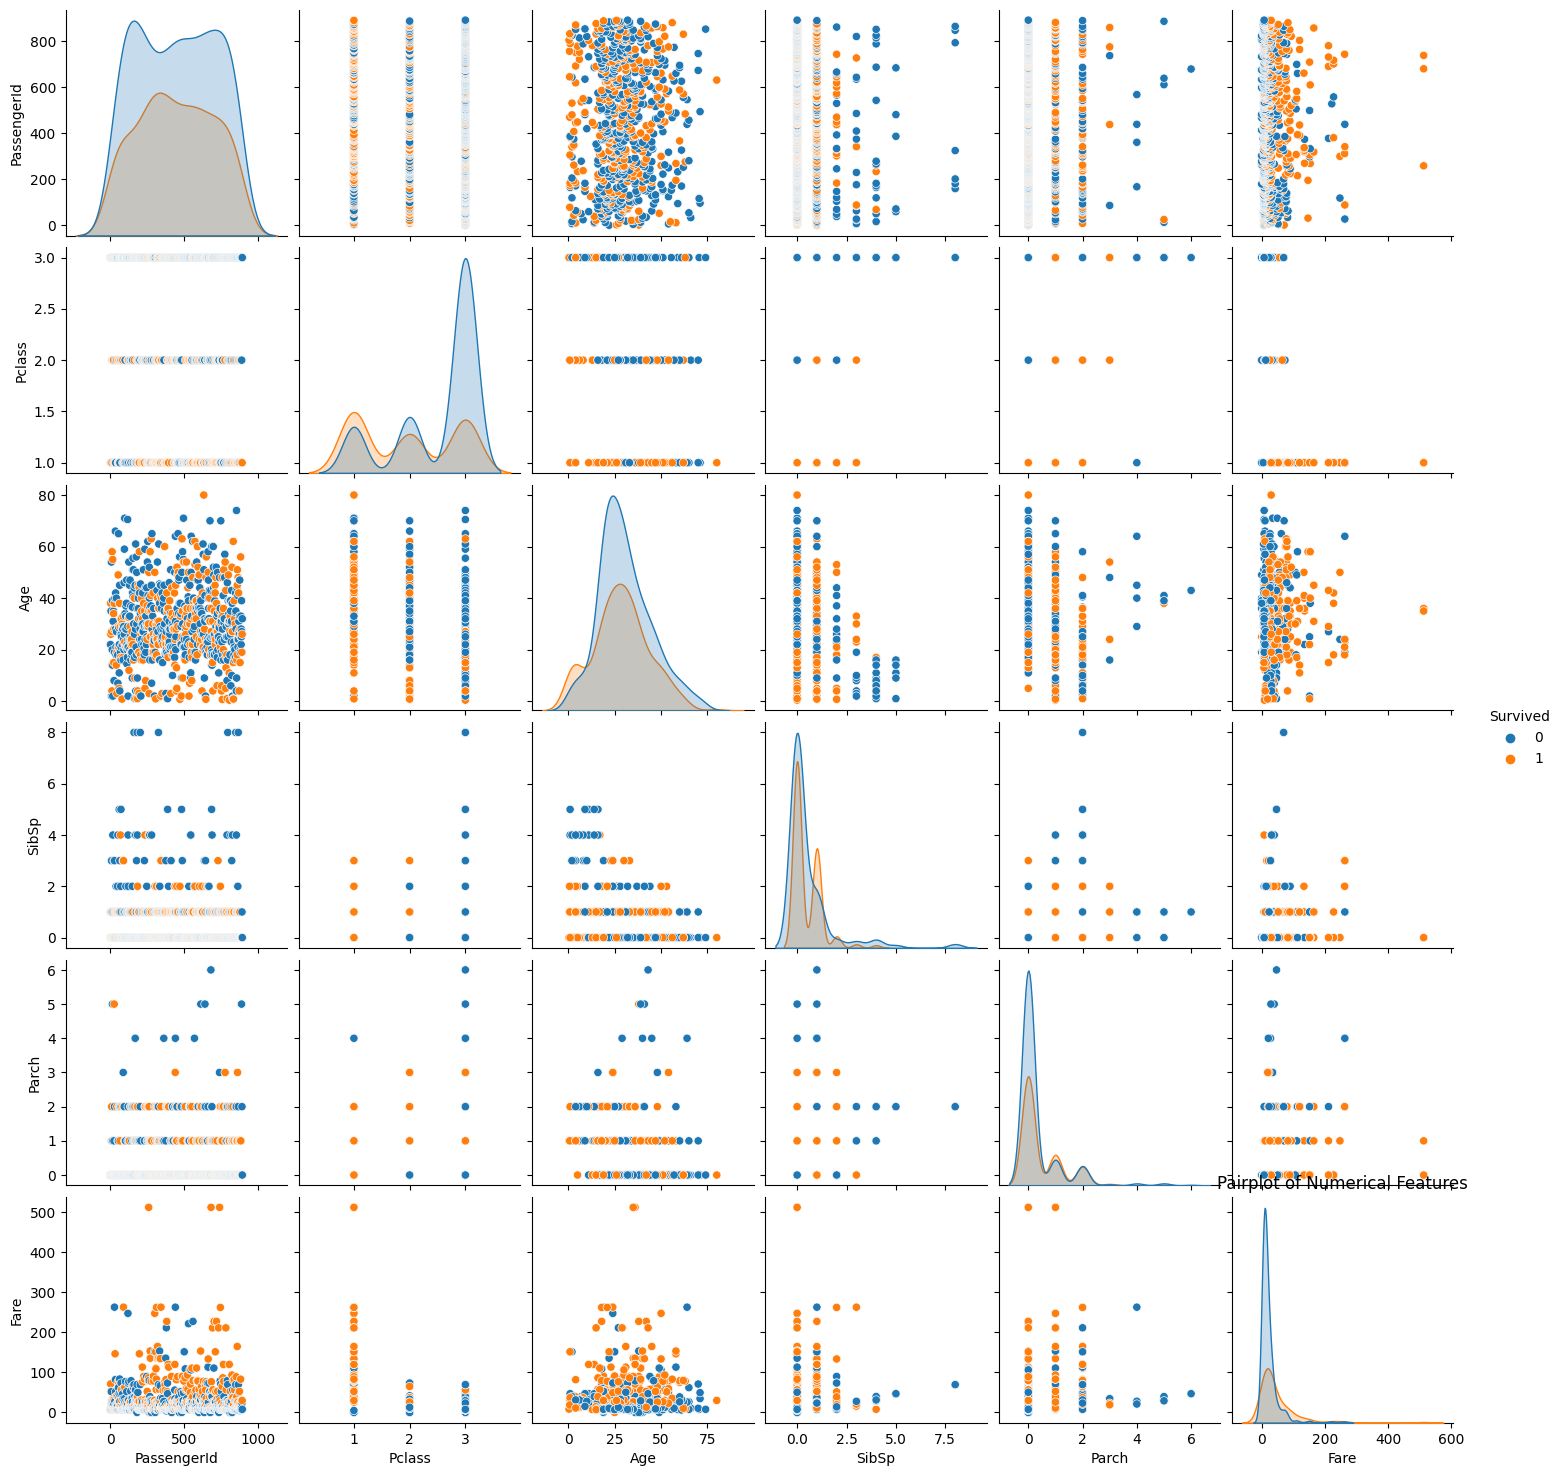

In [ ]:
sns.pairplot(data=train, hue='Survived')
plt.title('Pairplot of Numerical Features')
plt.show()

In [ ]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [ ]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


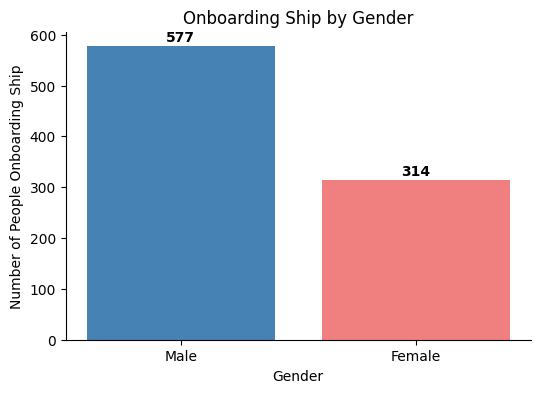

In [ ]:
# Data
gender = ['Male', 'Female']
index = [577, 314]
# Customize colors
colors = ['steelblue', 'lightcoral']
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))
# Create the bar plot with customized colors
bars = ax.bar(gender, index, color=colors)
# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval), ha='center', color='black', fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of People Onboarding Ship")
plt.title("Onboarding Ship by Gender")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [ ]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [ ]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


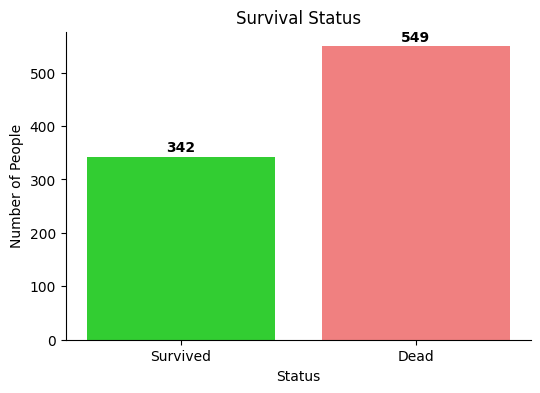

In [ ]:
status = ['Survived', 'Dead']
ind = [alive, dead]  # Replace 'alive' and 'dead' with the actual values
# Customize colors
colors = ['limegreen', 'lightcoral']
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.bar(status, ind, color=colors)

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval), ha='center', color='black', fontweight='bold')

# Customize labels and title
plt.xlabel("Status")
plt.ylabel("Number of People")
plt.title("Survival Status")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

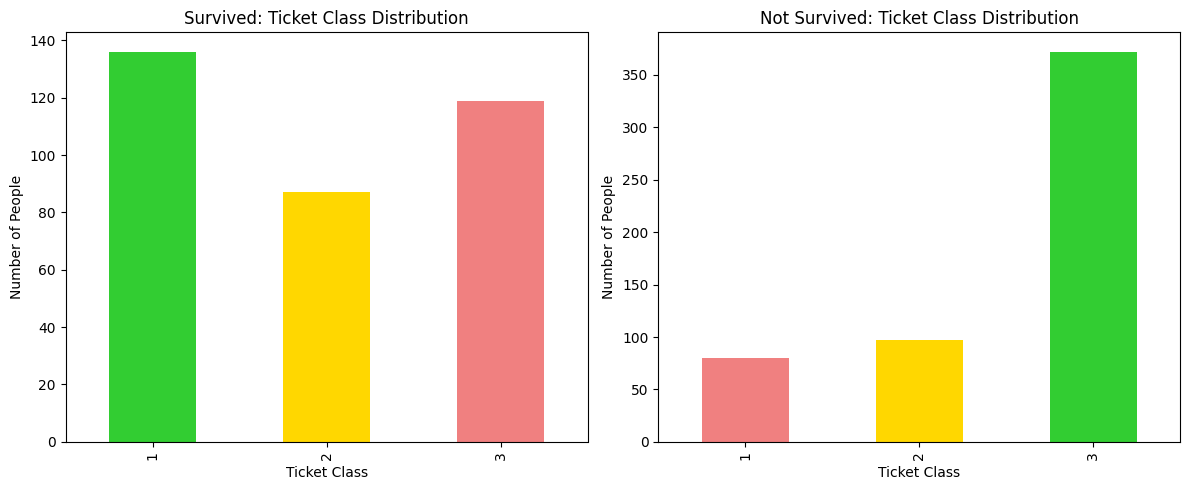

In [ ]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
survived_colors = ['limegreen', 'gold', 'lightcoral']
not_survived_colors = ['lightcoral', 'gold', 'limegreen']

# Plot for survived passengers
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar(ax=ax1, color=survived_colors)
ax1.set_title('Survived: Ticket Class Distribution')
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Number of People')

# Plot for passengers who couldn't survive
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar(ax=ax2, color=not_survived_colors)
ax2.set_title('Not Survived: Ticket Class Distribution')
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Number of People')
plt.tight_layout()
plt.show()

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [ ]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
#Droping Useless Columns
train = train.drop(['Ticket'], axis = 1)
train = train.drop(['Cabin'], axis = 1)
train = train.drop(['Name'], axis = 1)

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
#Display shape
test.shape

(418, 11)

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
test = test.drop(['Ticket'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [ ]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [ ]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [ ]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [ ]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [ ]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [ ]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [ ]:
#Training Testing and Spliting the model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [ ]:
# Model 1: Random Forest
print("\n=== Random Forest Model ===")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_report = classification_report(Y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("\nClassification Report:\n", rf_report)


=== Random Forest Model ===
Random Forest Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       156
           1       0.75      0.66      0.70       112

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [ ]:
# Model 2: Logistic Regression
print("\n=== Logistic Regression Model ===")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_predictions)
lr_report = classification_report(Y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print("\nClassification Report:\n", lr_report)


=== Logistic Regression Model ===
Logistic Regression Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       156
           1       0.74      0.65      0.69       112

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [ ]:
# Model 3: Gradient Boosting
print("\n=== Gradient Boosting Model ===")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, Y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(Y_test, gb_predictions)
gb_report = classification_report(Y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print("\nClassification Report:\n", gb_report)


=== Gradient Boosting Model ===
Gradient Boosting Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       156
           1       0.82      0.62      0.71       112

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [ ]:
# Model 4: Support Vector Machine (SVM)
print("\n=== Support Vector Machine (SVM) Model ===")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
svm_report = classification_report(Y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("\nClassification Report:\n", svm_report)


=== Support Vector Machine (SVM) Model ===
SVM Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [ ]:
# Model 5: Decision Tree
print("\n=== Decision Tree Model ===")
dt_model= DecisionTreeClassifier(criterion='entropy',random_state=7)
dt_model.fit(X_train,Y_train)
dt_predictions =dt_model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_report = classification_report(Y_test, dt_predictions)
print(f"Data Tree Accuracy: {dt_accuracy:.2f}")
print("\nClassification Report:\n", dt_report)


=== Decision Tree Model ===
Data Tree Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [ ]:
# Model 6: GaussianNB
print("\n=== Naive Bayes Model ===")
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
nb_predictions= nb_model.predict(X_test)
nb_accuracy = accuracy_score(Y_test, nb_predictions)
nb_report = classification_report(Y_test, nb_predictions)
print(f" Naive Bayes Accuracy: {dt_accuracy:.2f}")
print("\nClassification Report:\n",dt_report)

In [ ]:
final_accuracy = pd.DataFrame({
    'Model': ['Random Forest','Logistic Regression','Gradient Boosting','Support Vector Machines','Decision Tree','Naive Bayes'],
    'Score': [rf_accuracy,lr_accuracy,gb_accuracy,svm_accuracy,dt_accuracy,nb_accuracy]})

final_accuracy_df = final_accuracy.sort_values(by='Score', ascending=False)
final_accuracy_df =final_accuracy_df.set_index('Score')
print(final_accuracy)

                     Model     Score
0            Random Forest  0.764925
1      Logistic Regression  0.757463
2        Gradient Boosting  0.787313
3  Support Vector Machines  0.660448
4            Decision Tree  0.742537
5              Naive Bayes  0.768657


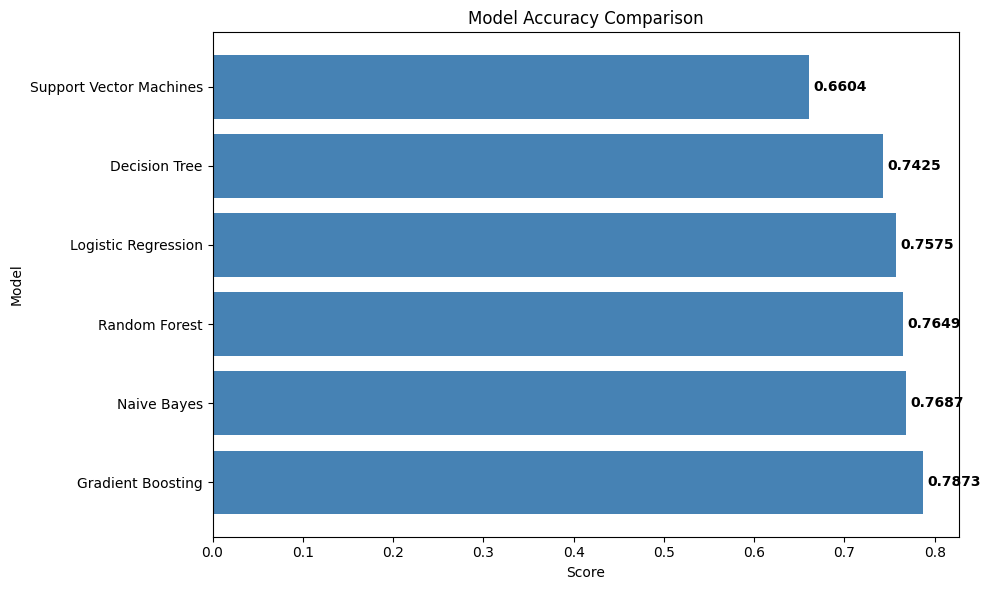

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(final_accuracy['Model'], final_accuracy['Score'], color='steelblue')

# Adding data labels on the bars
for i, v in enumerate(final_accuracy['Score']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center', color='black', fontweight='bold')

# Customize labels and title
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()